In [32]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Pra-processing

### Membaca citra dataset ORL

In [137]:
datasetFaces = []
for i in range(1,41):
    for j in range(1,11):
        citra = cv2.imread('/Users/iamapinn/Developer/UTS Pengolahan CITRA/ORL/'+str(i)+'/ORL_'+str(i)+'_'+str(j)+'.jpg', cv2.COLOR_BGR2GRAY)
        datasetFaces.append(citra)

datasetFaces = np.array(datasetFaces)

print('Jumlah total dataset:', len(datasetFaces))
print('Ukuran dataset:', datasetFaces.shape)

Jumlah total dataset: 400
Ukuran dataset: (400, 112, 92)


### Visualisasi Dataset

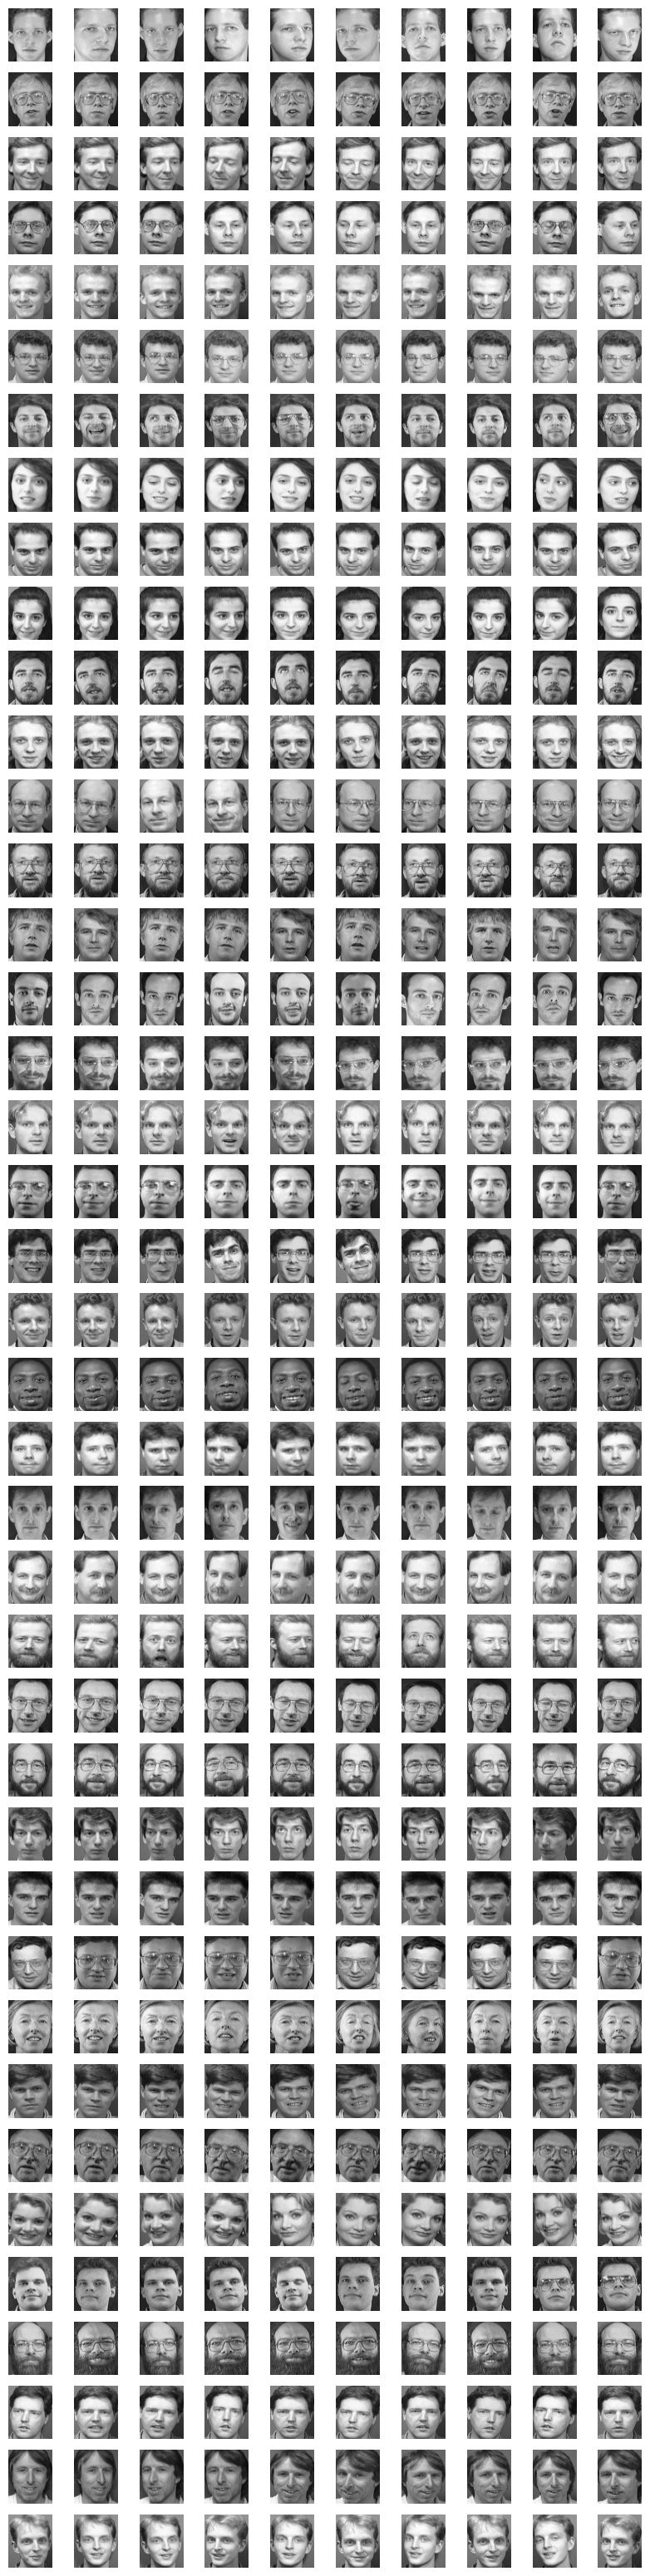

In [138]:
fig, ax = plt.subplots(40, 10, figsize=(10, 40))
for i in range(40):
    for j in range(10):
        ax[i, j].imshow(datasetFaces[i*10+j], cmap='gray')
        ax[i, j].axis('off')
plt.show()

## Processing

### Ekstraksi Fitur menggunakan Principal Component Analysis (PCA) yaitu mereduksi jumlah dimensi yang tinggi ke dimensi yang lebih rendah

#### 1. Pembentukan matriks data citra wajah

<p>Langkah pertama yang dilakukan
adalah membentuk matriks data citra
dengan mengambil data pixel setiap
citranya.</p>

In [139]:
datasetFaces = datasetFaces.reshape(400,10304)
datasetFaces = datasetFaces.astype('float32')
datasetFaces /= 255

print('Ukuran dataset:', datasetFaces.shape)
# pandas pixel
df = pd.DataFrame(datasetFaces)
df

Ukuran dataset: (400, 10304)


0         1         2         3         4         5         6      \
0    0.188235  0.207843  0.168627  0.168627  0.231373  0.200000  0.152941   
1    0.235294  0.247059  0.243137  0.211765  0.192157  0.207843  0.231373   
2    0.156863  0.117647  0.207843  0.188235  0.215686  0.196078  0.250980   
3    0.262745  0.207843  0.152941  0.141176  0.145098  0.137255  0.129412   
4    0.247059  0.294118  0.294118  0.219608  0.164706  0.192157  0.250980   
..        ...       ...       ...       ...       ...       ...       ...   
395  0.490196  0.482353  0.478431  0.482353  0.490196  0.494118  0.490196   
396  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   
397  0.482353  0.478431  0.474510  0.478431  0.486275  0.490196  0.486275   
398  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667  0.466667   
399  0.478431  0.482353  0.490196  0.494118  0.494118  0.490196  0.482353   

        7         8         9      ...     10294     10295     10296  \
0    0.188235  0.211765  0.188235  ...  0.152941  0.156863  0.164706   
1    0.243137  0.274510  0.282353  ...  0.129412  0.117647  0.121569   
2    0.156863  0.156863  0.121569  ...  0.117647  0.121569  0.129412   
3    0.125490  0.137255  0.172549  ...  0.682353  0.674510  0.650980   
4    0.286275  0.243137  0.196078  ...  0.117647  0.117647  0.121569   
..        ...       ...       ...  ...       ...       ...       ...   
395  0.482353  0.490196  0.490196  ...  0.137255  0.141176  0.149020   
396  0.501961  0.509804  0.509804  ...  0.356863  0.356863  0.356863   
397  0.482353  0.474510  0.474510  ...  0.137255  0.133333  0.133333   
398  0.466667  0.474510  0.466667  ...  0.262745  0.352941  0.349020   
399  0.478431  0.486275  0.486275  ...  0.141176  0.121569  0.117647   

        10297     10298     10299     10300     10301     10302     10303  
0    0.172549  0.180392  0.184314  0.180392  0.180392  0.180392  0.180392  
1    0.121569  0.121569  0.121569  0.129412  0.129412  0.129412  0.133333  
2    0.121569  0.117647  0.125490  0.113725  0.113725  0.109804  0.109804  
3    0.623529  0.631373  0.658824  0.549020  0.145098  0.043137  0.105882  
4    0.125490  0.129412  0.129412  0.145098  0.149020  0.149020  0.152941  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.152941  0.149020  0.145098  0.149020  0.152941  0.156863  0.160784  
396  0.356863  0.356863  0.356863  0.360784  0.360784  0.360784  0.364706  
397  0.137255  0.141176  0.145098  0.156863  0.156863  0.156863  0.152941  
398  0.388235  0.364706  0.376471  0.364706  0.360784  0.356863  0.352941  
399  0.137255  0.133333  0.117647  0.141176  0.141176  0.137255  0.137255  

[400 rows x 10304 columns]

#### 2. Pembagian data train dan test

<p>Langkah kedua yang dilakukan
adalah membagi data citra menjadi data train dan data test.</p>

In [237]:
numOfFeatures = 40  # Jumlah fitur atau kelas yang digunakan
train_size = 0.6  # Split Data dengan pengambilan random

trainData = []
testData = []

for i in range(numOfFeatures):
    # random data
    randomData = datasetFaces[i*10:i*10+10]
    np.random.shuffle(randomData)
    trainData.append(randomData[:int(train_size*10)])
    testData.append(randomData[int(train_size*10):])
    
trainData = np.array(trainData).reshape(int(train_size*numOfFeatures*10), 10304)
testData = np.array(testData).reshape(int((1-train_size)*numOfFeatures*10), 10304)

print('Ukuran data train:', trainData.shape)
print('Ukuran data test:', testData.shape)

Ukuran data train: (240, 10304)
Ukuran data test: (160, 10304)


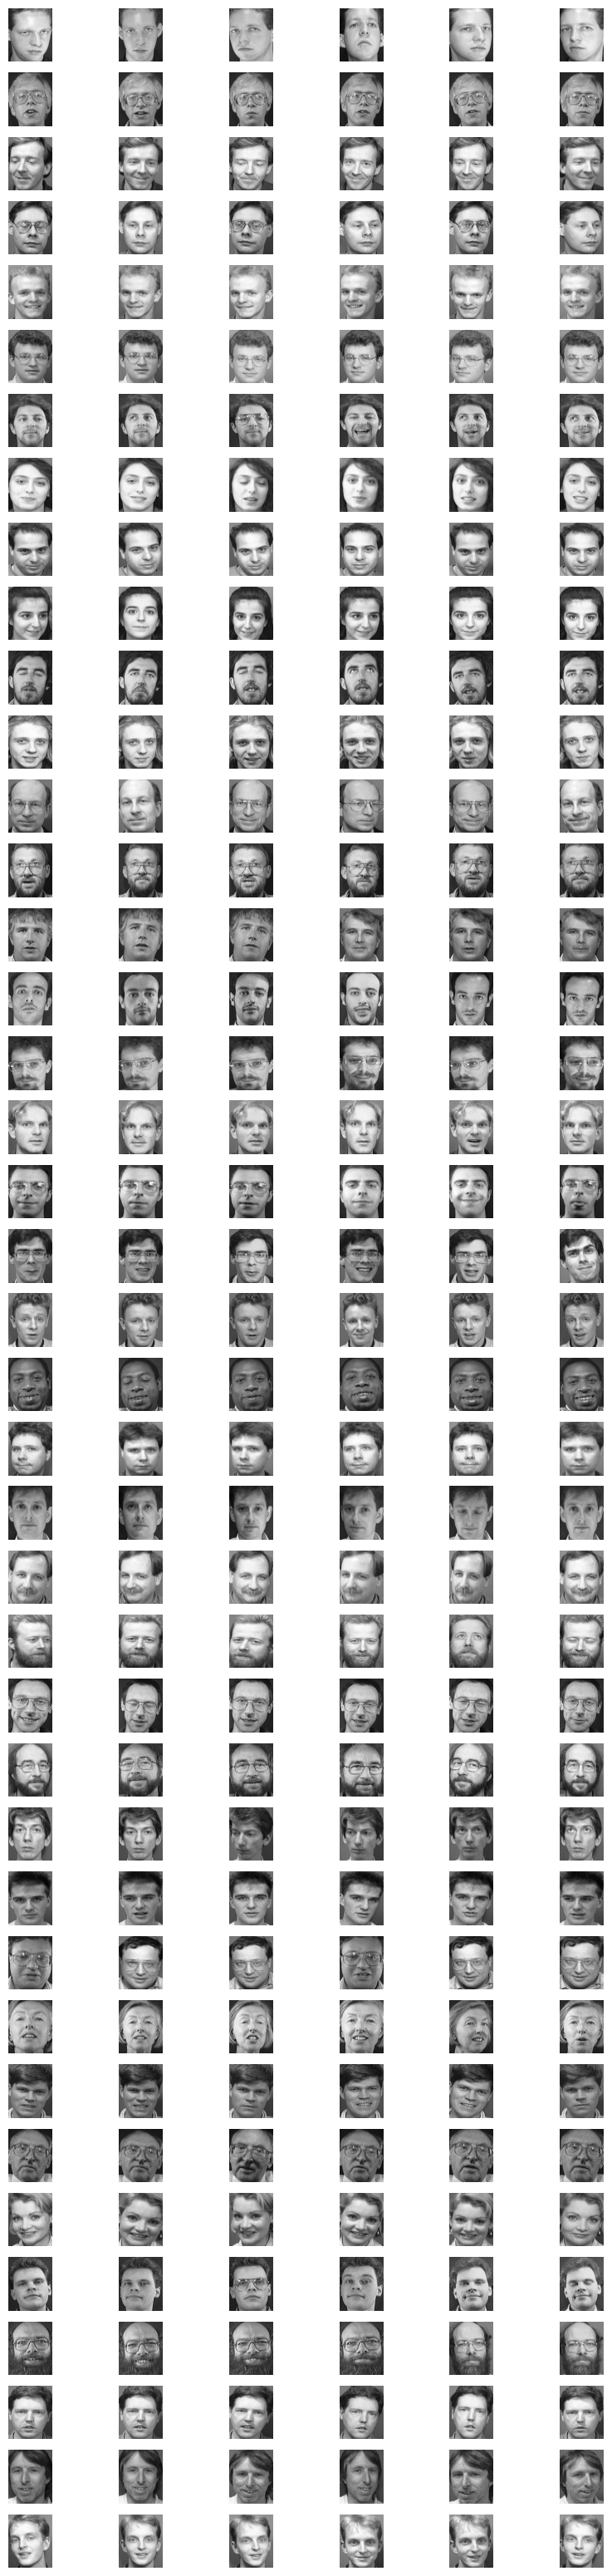

0         1         2         3         4         5         6      \
0    0.133333  0.113725  0.117647  0.141176  0.152941  0.149020  0.160784   
1    0.156863  0.117647  0.207843  0.188235  0.215686  0.196078  0.250980   
2    0.152941  0.247059  0.094118  0.250980  0.317647  0.305882  0.270588   
3    0.160784  0.156863  0.160784  0.164706  0.168627  0.168627  0.156863   
4    0.247059  0.294118  0.294118  0.219608  0.164706  0.192157  0.250980   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   
236  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039  0.498039   
237  0.490196  0.482353  0.478431  0.482353  0.490196  0.494118  0.490196   
238  0.482353  0.478431  0.474510  0.478431  0.486275  0.490196  0.486275   
239  0.498039  0.498039  0.498039  0.501961  0.501961  0.505882  0.505882   

        7         8         9      ...     10294     10295     10296  \
0    0.188235  0.207843  0.227451  ...  0.160784  0.156863  0.149020   
1    0.156863  0.156863  0.121569  ...  0.117647  0.121569  0.129412   
2    0.180392  0.223529  0.137255  ...  0.658824  0.650980  0.643137   
3    0.149020  0.121569  0.149020  ...  0.156863  0.145098  0.141176   
4    0.286275  0.243137  0.196078  ...  0.117647  0.117647  0.121569   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.501961  0.517647  0.505882  ...  0.356863  0.352941  0.352941   
236  0.498039  0.498039  0.498039  ...  0.352941  0.352941  0.352941   
237  0.482353  0.490196  0.490196  ...  0.137255  0.141176  0.149020   
238  0.482353  0.474510  0.474510  ...  0.137255  0.133333  0.133333   
239  0.505882  0.498039  0.494118  ...  0.345098  0.345098  0.352941   

        10297     10298     10299     10300     10301     10302     10303  
0    0.137255  0.125490  0.113725  0.149020  0.145098  0.141176  0.137255  
1    0.121569  0.117647  0.125490  0.113725  0.113725  0.109804  0.109804  
2    0.631373  0.615686  0.603922  0.607843  0.623529  0.572549  0.682353  
3    0.152941  0.160784  0.152941  0.176471  0.172549  0.168627  0.168627  
4    0.125490  0.129412  0.129412  0.145098  0.149020  0.149020  0.152941  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.349020  0.349020  0.349020  0.356863  0.352941  0.352941  0.349020  
236  0.352941  0.352941  0.352941  0.356863  0.356863  0.356863  0.356863  
237  0.152941  0.149020  0.145098  0.149020  0.152941  0.156863  0.160784  
238  0.137255  0.141176  0.145098  0.156863  0.156863  0.156863  0.152941  
239  0.352941  0.349020  0.345098  0.341176  0.341176  0.341176  0.337255  

[240 rows x 10304 columns]

In [238]:
# plot trainData
fig, ax = plt.subplots(numOfFeatures, int(10*train_size), figsize=(10, numOfFeatures))
for i in range(numOfFeatures):
    for j in range(int(10*train_size)):
        ax[i, j].imshow(trainData[i*int(10*train_size)+j].reshape(112,92), cmap='gray')
        ax[i, j].axis('off')
plt.show()

df_train = pd.DataFrame(trainData)
df_train

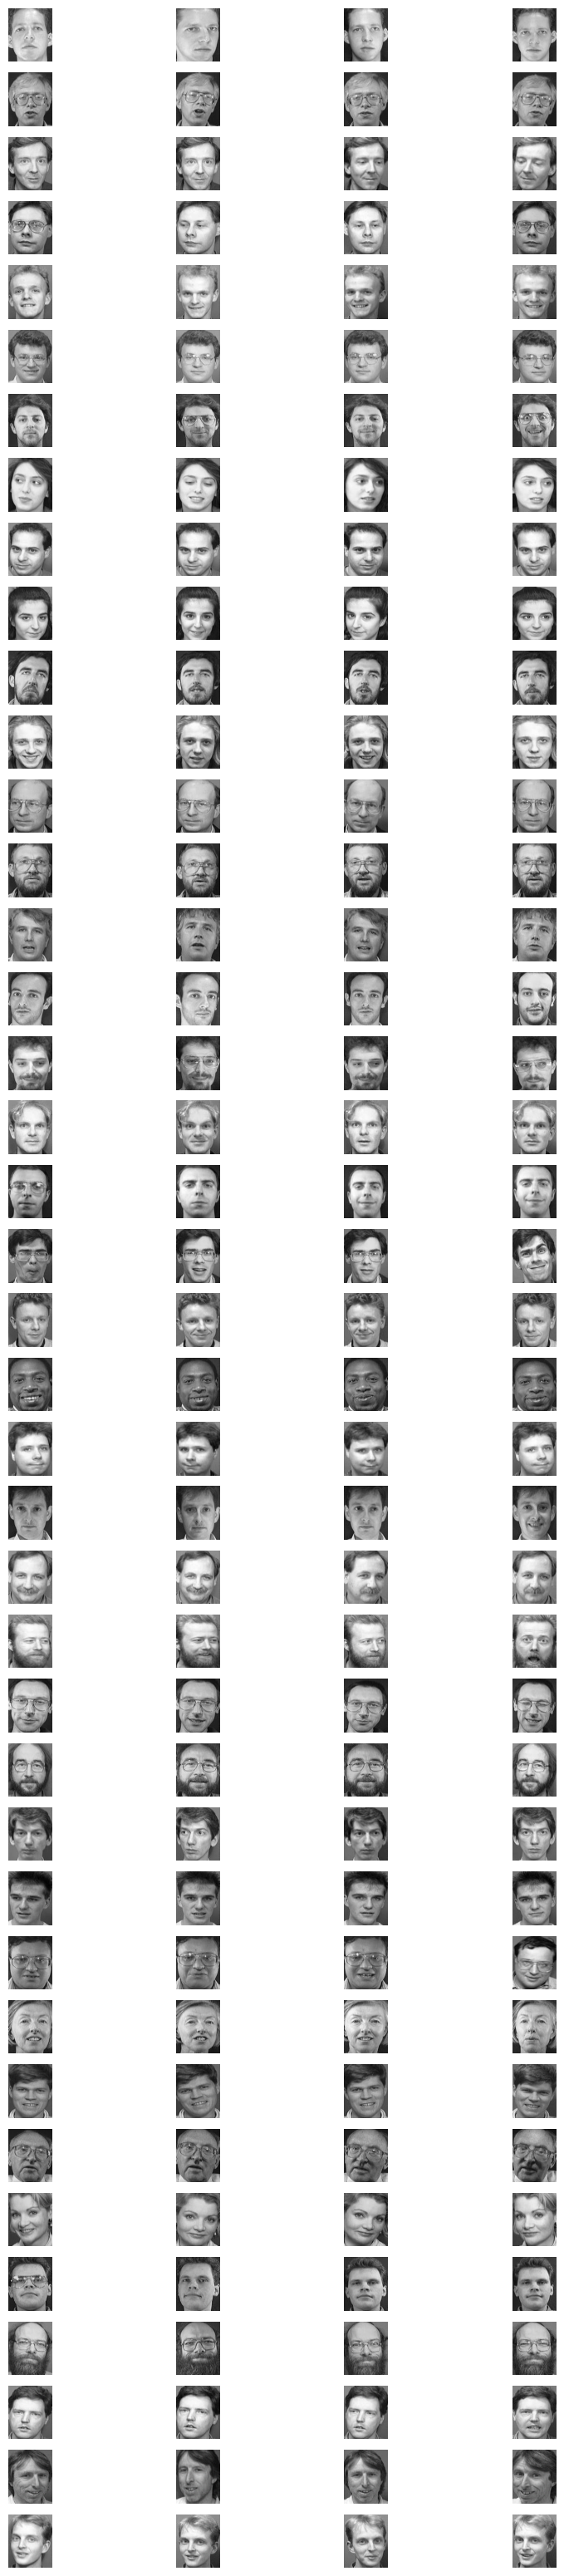

0         1         2         3         4         5         6      \
0    0.145098  0.180392  0.192157  0.168627  0.172549  0.203922  0.219608   
1    0.235294  0.247059  0.243137  0.211765  0.192157  0.207843  0.231373   
2    0.192157  0.152941  0.121569  0.113725  0.121569  0.121569  0.129412   
3    0.188235  0.207843  0.168627  0.168627  0.231373  0.200000  0.152941   
4    0.145098  0.145098  0.145098  0.145098  0.145098  0.145098  0.145098   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.380392  0.356863  0.352941  0.372549  0.376471  0.352941  0.341176   
156  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961  0.501961   
157  0.478431  0.482353  0.490196  0.494118  0.494118  0.490196  0.482353   
158  0.474510  0.474510  0.474510  0.474510  0.474510  0.474510  0.474510   
159  0.509804  0.494118  0.474510  0.474510  0.486275  0.494118  0.498039   

        7         8         9      ...     10294     10295     10296  \
0    0.203922  0.243137  0.188235  ...  0.094118  0.137255  0.141176   
1    0.243137  0.274510  0.282353  ...  0.129412  0.117647  0.121569   
2    0.141176  0.172549  0.239216  ...  0.168627  0.168627  0.156863   
3    0.188235  0.211765  0.188235  ...  0.152941  0.156863  0.164706   
4    0.145098  0.145098  0.145098  ...  0.568627  0.525490  0.584314   
..        ...       ...       ...  ...       ...       ...       ...   
155  0.349020  0.372549  0.368627  ...  0.266667  0.152941  0.172549   
156  0.501961  0.509804  0.509804  ...  0.356863  0.356863  0.356863   
157  0.478431  0.486275  0.486275  ...  0.141176  0.121569  0.117647   
158  0.474510  0.486275  0.482353  ...  0.149020  0.129412  0.149020   
159  0.494118  0.482353  0.490196  ...  0.137255  0.141176  0.145098   

        10297     10298     10299     10300     10301     10302     10303  
0    0.141176  0.129412  0.137255  0.149020  0.149020  0.149020  0.145098  
1    0.121569  0.121569  0.121569  0.129412  0.129412  0.129412  0.133333  
2    0.141176  0.129412  0.125490  0.164706  0.160784  0.152941  0.145098  
3    0.172549  0.180392  0.184314  0.180392  0.180392  0.180392  0.180392  
4    0.521569  0.537255  0.564706  0.505882  0.521569  0.545098  0.568627  
..        ...       ...       ...       ...       ...       ...       ...  
155  0.454902  0.458824  0.419608  0.486275  0.576471  0.580392  0.513726  
156  0.356863  0.356863  0.356863  0.360784  0.360784  0.360784  0.364706  
157  0.137255  0.133333  0.117647  0.141176  0.141176  0.137255  0.137255  
158  0.168627  0.156863  0.129412  0.156863  0.152941  0.152941  0.149020  
159  0.141176  0.141176  0.137255  0.141176  0.141176  0.145098  0.149020  

[160 rows x 10304 columns]

In [239]:
# plot testData
fig, ax = plt.subplots(numOfFeatures, int(10*(1-train_size)), figsize=(10, numOfFeatures))
for i in range(numOfFeatures):
    for j in range(int(10*(1-train_size))):
        ax[i, j].imshow(testData[i*int(10*(1-train_size))+j].reshape(112,92), cmap='gray')
        ax[i, j].axis('off')
plt.show()

df_test = pd.DataFrame(testData)
df_test

#### 3. Pencarian rata-rata seluruh citra train

<p>Setelah terbentuk matriks data citra
wajah, maka proses selanjutnya adalah
mencari nilai mean dari seluruh citra.
Hal ini bertujuan untuk untuk
mengetahui noise yang dapat
mengurangi tingkat keakuratan didalam
perhitungan PCA</p>

In [240]:
mean = np.mean(trainData, axis=0)

print('Ukuran Mean:', mean.shape)

dfMean = pd.DataFrame(mean)
dfMean

Ukuran Mean: (10304,)


0
0      0.336242
1      0.336062
2      0.335866
3      0.336977
4      0.336422
...         ...
10299  0.296634
10300  0.300033
10301  0.295098
10302  0.292680
10303  0.296062

[10304 rows x 1 columns]

#### 4. Penggandaan nilai rata-rata. 

<p>Pengandaan nilai rata-rata dilakukan
untuk menyamakan dimensi nilai ratarata dengan dimensi data citra sampel
sebanyak m, sehingga rata-rata seluruh
citra data sampel memiliki dimensi
(mxn)</p>

In [241]:
meanGanda = np.tile(mean, (trainData.shape[0], 1))

print("Ukuran Mean Ganda:", meanGanda.shape)

dfMeanGanda = pd.DataFrame(meanGanda)
dfMeanGanda

Ukuran Mean Ganda: (240, 10304)


0         1         2         3         4         5         6      \
0    0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
1    0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
2    0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
3    0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
4    0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
236  0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
237  0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
238  0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   
239  0.336242  0.336062  0.335866  0.336977  0.336422  0.336863  0.336863   

        7         8         9      ...     10294     10295     10296  \
0    0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
1    0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
2    0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
3    0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
4    0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
236  0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
237  0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
238  0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   
239  0.335801  0.335981  0.335883  ...  0.322876  0.314118  0.307255   

        10297     10298     10299     10300     10301    10302     10303  
0    0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
1    0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
2    0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
3    0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
4    0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
..        ...       ...       ...       ...       ...      ...       ...  
235  0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
236  0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
237  0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
238  0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  
239  0.314036  0.304559  0.296634  0.300033  0.295098  0.29268  0.296062  

[240 rows x 10304 columns]

#### 5. Perhitungan nilai rata-rata nol atau Zero Mean

<p>Perhitungan nilai rata-rata nol,
berfungsi untuk menghilangkan noise
yang dapat menganggu keakuratan
pada perhitungan PCA.</p>

In [256]:
ZeroMean = trainData - meanGanda
print("Ukuran Zero Mean:", ZeroMean.shape)

dfZeroMean = pd.DataFrame(ZeroMean)
dfZeroMean

Ukuran Zero Mean: (240, 10304)


0         1         2         3         4         5         6      \
0   -0.202909 -0.222337 -0.218219 -0.195801 -0.183481 -0.187843 -0.176079   
1   -0.179379 -0.218415 -0.128023 -0.148742 -0.120736 -0.140785 -0.085883   
2   -0.183301 -0.089004 -0.241749 -0.085997 -0.018775 -0.030981 -0.066275   
3   -0.175458 -0.179200 -0.175082 -0.172272 -0.167794 -0.168236 -0.180000   
4   -0.089183 -0.041945 -0.041749 -0.117370 -0.171716 -0.144706 -0.085883   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.165719  0.165898  0.166094  0.164983  0.165539  0.165098  0.165098   
236  0.161797  0.161977  0.162173  0.161062  0.161617  0.161176  0.161176   
237  0.153954  0.146291  0.142565  0.145375  0.153774  0.157255  0.153333   
238  0.146111  0.142369  0.138643  0.141454  0.149853  0.153333  0.149411   
239  0.161797  0.161977  0.162173  0.164983  0.165539  0.169019  0.169019   

        7         8         9      ...     10294     10295     10296  \
0   -0.147566 -0.128137 -0.108432  ... -0.162092 -0.157255 -0.158235   
1   -0.178938 -0.179118 -0.214314  ... -0.205229 -0.192549 -0.177843   
2   -0.155409 -0.112451 -0.198628  ...  0.335948  0.336863  0.335882   
3   -0.186781 -0.214412 -0.186863  ... -0.166013 -0.169020 -0.166078   
4   -0.049526 -0.092843 -0.139804  ... -0.205229 -0.196471 -0.185686   
..        ...       ...       ...  ...       ...       ...       ...   
235  0.166160  0.181667  0.170000  ...  0.033987  0.038824  0.045686   
236  0.162238  0.162059  0.162157  ...  0.030065  0.038824  0.045686   
237  0.146552  0.154216  0.154313  ... -0.185621 -0.172941 -0.158235   
238  0.146552  0.138529  0.138627  ... -0.185621 -0.180784 -0.173922   
239  0.170081  0.162059  0.158235  ...  0.022222  0.030980  0.045686   

        10297     10298     10299     10300     10301     10302     10303  
0   -0.176781 -0.179069 -0.182909 -0.151013 -0.150000 -0.151503 -0.158807  
1   -0.192467 -0.186912 -0.171144 -0.186307 -0.181373 -0.182876 -0.186258  
2    0.317337  0.311128  0.307288  0.307811  0.328431  0.279869  0.386291  
3   -0.161095 -0.143774 -0.143693 -0.123562 -0.122549 -0.124052 -0.127435  
4   -0.188546 -0.175147 -0.167222 -0.154935 -0.146078 -0.143660 -0.143121  
..        ...       ...       ...       ...       ...       ...       ...  
235  0.034984  0.044461  0.052386  0.056830  0.057843  0.060261  0.052958  
236  0.038905  0.048382  0.056307  0.056830  0.061765  0.064183  0.060801  
237 -0.161095 -0.155539 -0.151536 -0.151013 -0.142157 -0.135817 -0.135278  
238 -0.176781 -0.163382 -0.151536 -0.143170 -0.138235 -0.135817 -0.143121  
239  0.038905  0.044461  0.048464  0.041144  0.046078  0.048497  0.041193  

[240 rows x 10304 columns]

#### 6. Pembentukan matrik kovarian

<p>Hasil perhitungan nilai rata-rata nol
digunakan untuk mendapatkan nilai
matriks kovarian. Berikut ini adalah
persamaan matriks kovarian:</p>

\begin{equation}
c=\frac{1}{m-1} \phi_{j i} * \phi^T{ }_{j i}
\end{equation}

In [257]:
Cov = np.dot(ZeroMean, ZeroMean.T) / (ZeroMean.shape[0] - 1)

print("Ukuran Covariance Matrix:", Cov.shape)

dfCovMatrix = pd.DataFrame(Cov)
dfCovMatrix

Ukuran Covariance Matrix: (240, 240)


0         1         2         3         4         5         6    \
0    1.280445  0.551752  0.413279  0.899211  1.035513  0.771495  0.232789   
1    0.551752  1.287845  0.637341  0.552289  0.722162  0.660598  0.342414   
2    0.413279  0.637341  1.528849  0.745412  0.812090  1.296014  0.283251   
3    0.899211  0.552289  0.745412  1.815902  1.276341  1.247460  0.259058   
4    1.035513  0.722162  0.812090  1.276341  1.725867  1.198707  0.306775   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.243366  0.100548  0.251266  0.357731  0.321034  0.439159 -0.125117   
236  0.374392  0.068442  0.288565  0.461479  0.421088  0.531017 -0.129981   
237  0.115843  0.196720  0.015274  0.169387  0.182276  0.093635 -0.063679   
238  0.232390  0.170951  0.013501  0.219342  0.225384  0.131604 -0.083393   
239  0.153359  0.167979  0.289907  0.241112  0.279769  0.360924 -0.123471   

          7         8         9    ...       230       231       232  \
0    0.263557  0.260819  0.210575  ... -0.630851 -0.585815 -0.630717   
1    0.410107  0.380457  0.378618  ... -0.537835 -0.532993 -0.495940   
2    0.230407  0.143696  0.091592  ... -0.692546 -0.723092 -0.545360   
3    0.155203  0.167316  0.116976  ... -0.745292 -0.552189 -0.585424   
4    0.317300  0.254527  0.198563  ... -0.758056 -0.696907 -0.682022   
..        ...       ...       ...  ...       ...       ...       ...   
235 -0.024337 -0.096212 -0.180462  ... -0.320709 -0.314530 -0.392683   
236 -0.025300 -0.102251 -0.209713  ... -0.367926 -0.320763 -0.410711   
237 -0.018404 -0.058184 -0.074224  ... -0.149644 -0.208274 -0.167721   
238 -0.010414 -0.072250 -0.099141  ... -0.153322 -0.200015 -0.205366   
239 -0.043284 -0.112090 -0.165230  ... -0.318315 -0.426702 -0.383286   

          233       234       235       236       237       238       239  
0   -0.435789  0.212921  0.243366  0.374392  0.115843  0.232390  0.153359  
1   -0.532751  0.227934  0.100548  0.068442  0.196720  0.170951  0.167979  
2   -0.594937  0.506737  0.251266  0.288565  0.015274  0.013501  0.289907  
3   -0.519585  0.320289  0.357731  0.461479  0.169387  0.219342  0.241112  
4   -0.599809  0.429596  0.321034  0.421088  0.182276  0.225384  0.279769  
..        ...       ...       ...       ...       ...       ...       ...  
235 -0.147110  0.302945  0.688396  0.557207  0.259889  0.339462  0.403566  
236 -0.095880  0.329550  0.557207  0.848991  0.295295  0.444411  0.334366  
237 -0.095720  0.099805  0.259889  0.295295  0.814185  0.605208  0.244731  
238 -0.036552  0.118040  0.339462  0.444411  0.605208  0.821480  0.240426  
239 -0.255243  0.383481  0.403566  0.334366  0.244731  0.240426  0.675230  

[240 rows x 240 columns]

#### 7. Penentuan matriks eigenvalue dan eigenvector

<p>Setelah matriks kovarian didapatkan maka langkah selanjutnya adalah menentukan matriks eigenvalue dan matriks eigenvector. Matriks eigen dapat dicari menggunakan persamaan: </p>

\begin{equation}
\begin{gathered}
C-Z=|C-\lambda I| \\
|C-\lambda I|=0
\end{gathered}
\end{equation}

<p>Dimana C adalah matriks kovarian. Z adalah matriks eigenvalue dengan 𝜆 sebagai scalar pembentuknya dan I sebagai matriks identitas.</p>

In [258]:
eigenvalues, eigenvectors = np.linalg.eig(Cov)

print("Eigenvalues: ", eigenvalues.shape)

dfEigenvalues = pd.DataFrame(eigenvalues)
dfEigenvalues

Eigenvalues:  (240,)


0
0    43.282814
1    32.625069
2    16.574520
3    14.132211
4    12.239863
..         ...
235   0.118996
236   0.133109
237   0.110499
238   0.118661
239   0.118147

[240 rows x 1 columns]

In [259]:
print("Eigenvectors: ", eigenvectors.shape)

dfEigenvectors = pd.DataFrame(eigenvectors)
dfEigenvectors

Eigenvectors:  (240, 240)


0         1         2         3         4         5         6    \
0    0.103526  0.038975  0.063113  0.094005  0.065208  0.026431 -0.069100   
1    0.104197  0.011123  0.065155 -0.004096 -0.081734 -0.063955 -0.065613   
2    0.101828  0.049584  0.004608  0.124215 -0.111690 -0.023883  0.058760   
3    0.108608  0.050609  0.036679  0.159938  0.060209 -0.120210 -0.079206   
4    0.142892  0.033068  0.013046  0.140813  0.002181 -0.038190 -0.064985   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.042510  0.069259 -0.050268  0.022623  0.079329 -0.031745 -0.005306   
236  0.041644  0.081861 -0.061582  0.054388  0.096745 -0.017072  0.005454   
237  0.027260  0.046223 -0.095504 -0.034392 -0.005980 -0.036190 -0.032881   
238  0.034470  0.042464 -0.095273 -0.021220  0.039279 -0.020948 -0.036122   
239  0.048707  0.068879 -0.054993 -0.037307  0.000671 -0.041745  0.012272   

          7         8         9    ...       230       231       232  \
0    0.061877  0.033347  0.081513  ... -0.003456  0.020183  0.044954   
1    0.034015  0.114766  0.138445  ... -0.020865  0.024533  0.010645   
2   -0.102166 -0.041589  0.072343  ... -0.074409  0.039997  0.069704   
3    0.020972 -0.061084  0.045703  ... -0.067892 -0.064815 -0.050052   
4    0.021966 -0.002494  0.012977  ...  0.037115 -0.010596 -0.017946   
..        ...       ...       ...  ...       ...       ...       ...   
235 -0.085271  0.028954 -0.013253  ... -0.012011 -0.172004 -0.011851   
236 -0.036405  0.023853  0.016710  ... -0.049190 -0.067249 -0.014999   
237  0.136371  0.080560  0.067354  ... -0.186313  0.038061 -0.065235   
238  0.087256  0.110710  0.055560  ...  0.163264  0.028385 -0.016624   
239 -0.090921  0.021153 -0.018138  ...  0.003099 -0.011464 -0.133354   

          233       234       235       236       237       238       239  
0   -0.050488  0.065070  0.106309 -0.004466  0.000266 -0.053698 -0.007428  
1   -0.053826 -0.025997  0.027631 -0.073317 -0.040693 -0.037898  0.066174  
2   -0.106598 -0.015233 -0.069626  0.098394  0.012869 -0.028530  0.017332  
3   -0.053153 -0.040882  0.010321 -0.154616 -0.001112 -0.083182  0.157017  
4    0.067827 -0.055025 -0.014162  0.068336  0.097766  0.032116 -0.001710  
..        ...       ...       ...       ...       ...       ...       ...  
235 -0.000866  0.034481  0.019781  0.100303  0.036157  0.041241  0.129926  
236 -0.015632 -0.072318  0.042106 -0.003415  0.027185  0.074187 -0.095507  
237  0.060838 -0.016123  0.070115  0.134107  0.071557 -0.031671  0.002791  
238 -0.088349  0.021532 -0.097367  0.026710 -0.001023 -0.009211  0.073512  
239  0.017112  0.021836 -0.035861  0.087334 -0.042313  0.176804 -0.009372  

[240 rows x 240 columns]

##### Mengurutkan nilai Eigenvalues dan Eigenvectors

In [260]:
idx = eigenvalues.argsort()[::-1]
sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]

#### 8. Penentuan Proyeksi Matrix

<p>Proyeksi matriks digunakan untuk mengurangi dimensi data citra sampel menjadi dimensi yang lebih rendah. Proyeksi matriks dapat dicari menggunakan persamaan:</p>


\begin{equation}
\text { Proyeksi }=\left(\text { Zeromean }^{\top}{ }^* \text { Eigenvector }\right)^{\top}
\end{equation}

In [261]:
Proyeksi = np.dot(ZeroMean.T, sorted_eigenvectors).T

print("Ukuran Proyeksi:", Proyeksi.shape)

dfProyeksi = pd.DataFrame(Proyeksi)
dfProyeksi

Ukuran Proyeksi: (240, 10304)


0         1         2         3         4         5         6      \
0   -0.227604 -0.210342 -0.217992 -0.205758 -0.191270 -0.167517 -0.159897   
1    1.267667  1.275751  1.264266  1.270960  1.282000  1.283821  1.285972   
2   -1.256664 -1.264995 -1.264050 -1.260015 -1.258404 -1.265470 -1.275105   
3   -0.741778 -0.748405 -0.771806 -0.757382 -0.770434 -0.776704 -0.771200   
4    0.011862 -0.001216  0.010467 -0.003867 -0.001323 -0.019565 -0.019199   
..        ...       ...       ...       ...       ...       ...       ...   
235  0.006036  0.007166  0.016809  0.015482  0.006399 -0.002665 -0.000515   
236 -0.002919  0.006282  0.006239  0.009319  0.010196  0.006413  0.003239   
237  0.010112 -0.000806  0.004148 -0.004746 -0.005612 -0.006650 -0.010163   
238  0.002955 -0.005834 -0.014548 -0.005669  0.008943  0.014822  0.003707   
239 -0.000003 -0.000002 -0.000003 -0.000002 -0.000003 -0.000002 -0.000002   

        7             8         9      ...         10294     10295  \
0   -0.173741 -1.668111e-01 -0.145504  ... -8.972392e-01 -0.889630   
1    1.277902  1.263045e+00  1.264966  ... -4.047162e-01 -0.354970   
2   -1.288611 -1.290309e+00 -1.267042  ... -3.453964e-01 -0.600833   
3   -0.772890 -7.797495e-01 -0.779617  ...  1.070782e+00  0.910436   
4    0.003946  1.676195e-02  0.034496  ... -2.062676e-01 -0.242939   
..        ...           ...       ...  ...           ...       ...   
235  0.001461  1.998437e-02  0.022587  ... -5.769368e-02 -0.024338   
236 -0.005808  5.005626e-03  0.011810  ... -4.715244e-02 -0.018262   
237 -0.007180  4.104613e-03  0.006917  ... -1.210835e-02 -0.030010   
238 -0.005277  6.842161e-03  0.005562  ... -4.652289e-02 -0.028887   
239 -0.000002 -5.335357e-07 -0.000002  ...  3.997991e-07  0.000002   

            10296     10297     10298         10299     10300     10301  \
0   -9.483553e-01 -0.958772 -0.983087 -8.621217e-01 -0.788535 -0.725451   
1   -3.485000e-01 -0.460437 -0.411032 -4.117044e-01 -0.602724 -0.677199   
2   -7.489607e-01 -0.774859 -0.832518 -9.591990e-01 -0.971138 -0.996621   
3    9.255323e-01  1.045236  1.027721  8.400056e-01  0.791400  0.666484   
4   -1.777364e-01 -0.121452 -0.043490 -9.775972e-02 -0.072405  0.010426   
..            ...       ...       ...           ...       ...       ...   
235  1.213382e-02  0.016417  0.001004  2.326721e-02 -0.001472  0.021539   
236 -1.286301e-02  0.008394  0.017968  3.374892e-03  0.011470 -0.045208   
237 -3.684470e-02  0.002601  0.006305  1.657227e-02  0.012130 -0.008457   
238 -5.813731e-02 -0.079580 -0.051415  2.881649e-02  0.115369 -0.005548   
239  3.274687e-07  0.000001  0.000002 -5.425631e-07 -0.000001 -0.000002   

            10302         10303  
0   -6.827598e-01 -7.702990e-01  
1   -6.225078e-01 -6.437708e-01  
2   -1.003974e+00 -1.012566e+00  
3    6.036212e-01  6.596649e-01  
4    7.208543e-02  5.384584e-02  
..            ...           ...  
235  3.636808e-02  5.198542e-02  
236 -6.971314e-02 -4.697549e-02  
237  3.980099e-02  3.693505e-02  
238 -5.375511e-02 -6.098409e-03  
239  6.168300e-07 -4.802577e-08  

[240 rows x 10304 columns]

#### 9. Penentuan Bobot Matrix

<p> 
Bobot matriks digunakan untuk menghitung nilai akurasi dari data test. Bobot matriks dapat dicari menggunakan persamaan:
</p>

\begin{equation}
\text { Bobot }=\text { Training }{ }^* \text { Proyeksi }^T
\end{equation}

In [262]:
bobot = np.dot(trainData, Proyeksi.T)
print("Ukuran Bobot:", bobot.shape)

dfBobot = pd.DataFrame(bobot)
dfBobot

Ukuran Bobot: (240, 240)


0            1           2           3           4           5    \
0    4270.184570  2566.866699  395.982727  222.379089 -336.497986  399.377319   
1    4277.125977  2349.696533  404.070526 -108.964417 -766.350159  221.067780   
2    4252.619629  2649.591797  164.224609  324.416199 -853.982239  300.120300   
3    4322.761230  2657.577881  291.267761  445.076477 -351.123077  110.091202   
4    4677.413574  2520.807129  197.650650  380.478729 -520.872742  271.896576   
..           ...          ...         ...         ...         ...         ...   
235  3639.003662  2802.998535  -53.152924  -18.720856 -295.187775  284.610352   
236  3630.041992  2901.263672  -97.973381   88.569664 -244.242523  313.556335   
237  3481.246094  2623.380859 -232.349075 -211.292099 -544.746460  275.841827   
238  3555.830566  2594.069092 -231.434982 -166.805420 -412.349182  305.910431   
239  3703.103271  2800.037842  -71.872551 -221.139526 -525.289490  264.882172   

            6           7           8           9    ...       230       231  \
0   -316.215576 -108.499969 -228.714706  -45.490444  ... -2.543979  0.154796   
1   -310.644257 -146.586319 -132.302902   16.500244  ... -0.888896 -0.777489   
2   -111.918030 -332.744751 -317.448914  -55.475056  ... -3.273441 -0.418760   
3   -332.363586 -164.416290 -340.533752  -84.483002  ... -1.748798 -0.233905   
4   -309.641144 -163.057388 -271.155518 -120.116081  ... -1.181110 -0.082507   
..          ...         ...         ...         ...  ...       ...       ...   
235 -214.283691 -309.649506 -233.915909 -148.677292  ... -2.452373  2.390850   
236 -197.092041 -242.850998 -239.956696 -116.051636  ... -1.311216 -0.137983   
237 -258.343658   -6.666808 -172.807068  -60.907623  ... -2.604997 -0.065379   
238 -263.522278  -73.805992 -137.105484  -73.750084  ... -0.928463 -1.538927   
239 -186.197098 -317.372833 -243.153549 -153.996002  ... -1.601065 -1.147388   

          232       233       234       235       236       237       238  \
0    0.689165 -0.544015 -0.261073 -0.790305 -1.123501 -0.715477  0.884818   
1    0.256917 -0.677051  0.131760 -0.601745 -1.321212 -0.018722  0.598705   
2    0.532308 -0.366988 -0.328041 -0.833938 -1.290912 -0.669856  0.766997   
3    0.443368 -0.795154  0.232200 -0.591810 -1.257244 -0.223582  0.761987   
4   -0.237769 -0.275582 -0.206676 -0.302470 -1.529261  0.104366  0.798083   
..        ...       ...       ...       ...       ...       ...       ...   
235 -1.274336 -1.136569 -0.959509 -0.670461 -1.661629  0.326586  0.968060   
236  0.770015 -0.934277  0.378974 -1.152238 -0.776221 -0.144717  0.516774   
237  1.346691 -0.089998 -0.259706 -0.074827 -2.023802 -0.754468  0.824863   
238 -0.866420 -1.509910 -0.628017 -1.202970 -1.473069 -0.640137  0.626561   
239  0.497837  0.180805  0.218096 -0.631159 -1.715860  0.167027  0.849805   

          239  
0   -0.000183  
1   -0.000165  
2   -0.000152  
3   -0.000183  
4   -0.000192  
..        ...  
235 -0.000172  
236 -0.000165  
237 -0.000159  
238 -0.000163  
239 -0.000181  

[240 rows x 240 columns]

# Sisa data dari training diuji secara keseluruhan dengan menampilkan jumlah klasifikasi benar atau salah.

In [263]:
# Calculate the distances between test data and training data
distances = np.linalg.norm(testData[:, np.newaxis] - trainData, axis=2)

# Find the index of the nearest neighbor for each test data
nearest_neighbors = np.argmin(distances, axis=1)

# Calculate the predicted labels based on the nearest neighbors
predicted_labels = np.floor_divide(nearest_neighbors, int(10*train_size))

# Calculate the actual labels for the test data
actual_labels = np.repeat(np.arange(numOfFeatures), int(10*(1-train_size)))

# Calculate the number of correct classifications
correct_classifications = np.sum(predicted_labels == actual_labels)

# Calculate the number of incorrect classifications
incorrect_classifications = np.sum(predicted_labels != actual_labels)

# Display the results
print("Number of correct classifications:", correct_classifications)
print("Number of incorrect classifications:", incorrect_classifications)


Number of correct classifications: 147
Number of incorrect classifications: 13


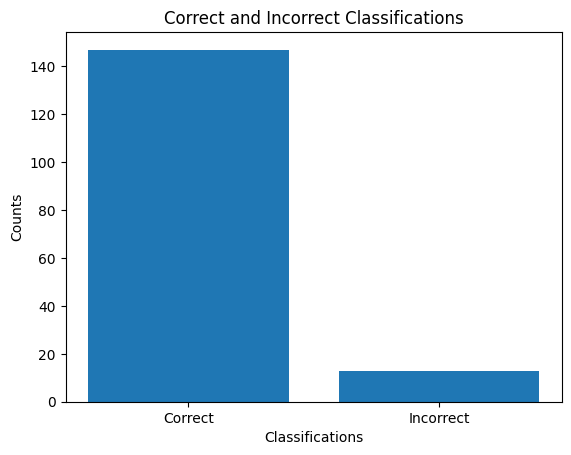

In [264]:
import matplotlib.pyplot as plt

# Define the data
classifications = ['Correct', 'Incorrect']
counts = [correct_classifications, incorrect_classifications]

# Plot the bar chart
plt.bar(classifications, counts)
plt.xlabel('Classifications')
plt.ylabel('Counts')
plt.title('Correct and Incorrect Classifications')
plt.show()


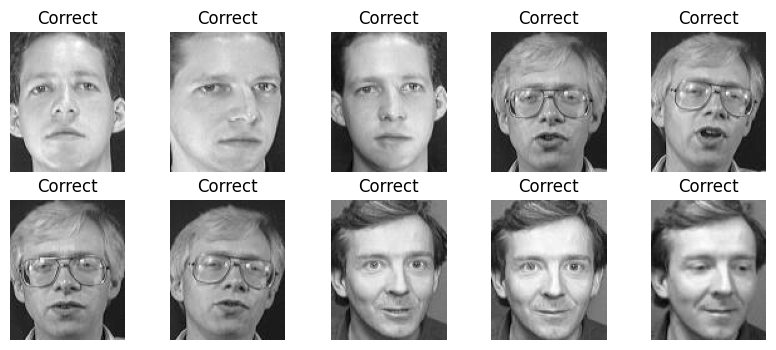

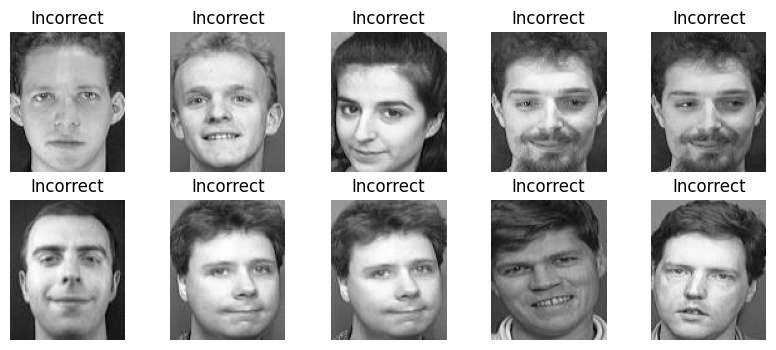

In [266]:
# Plot the images of correct classifications
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(testData[predicted_labels == actual_labels][i*5+j].reshape(112, 92), cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title('Correct')
plt.show()

# Plot the images of incorrect classifications
fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(testData[predicted_labels != actual_labels][i*5+j].reshape(112, 92), cmap='gray')
        ax[i, j].axis('off')
        ax[i, j].set_title('Incorrect')
plt.show()

